# Plot CAR

In [1]:
import stata_setup

stata_setup.config('/Applications/StataNow', 'mp')


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 19.5
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2025 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Unlimited-user 2-core network, expiring  9 Sep 2026
Serial number: 501909305069
  Licensed to: 罗奕辰
               UCL

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.



. 
. ****************************
. * Dynamic Event Study Plot with 95% CI
. ****************************
. 
. clear all

. set more off

. 
. global PROCESSED_DATA "processed_data"

. global FIGURES "figures"

. 
. * iterate over the two event types: proposal created and proposal end
. foreach stage in created end {
  2.     import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv"
> , varnames(1) clear
  3.     keep index car
  4.     destring index car, replace force
  5.     collapse (mean) mean_car=car (sd) sd_car=car (count) N_car=car, by(ind
> ex)
  6.     gen se_car = sd_car / sqrt(N_car)
  7.     gen tcrit  = invttail(N_car-1, 0.05)
  8.     gen lo_car = mean_car - tcrit*se_car
  9.     gen hi_car = mean_car + tcrit*se_car
 10. 
.     * ----- Plot with shaded 90% CI bands -----
.     twoway ///
>         (rcap lo_car hi_car index, lcolor(black) lwidth(large)) ///
>         (scatter mean_car index, lwidth(medthick) lpattern(solid)  ///
>                 lcolor(bla

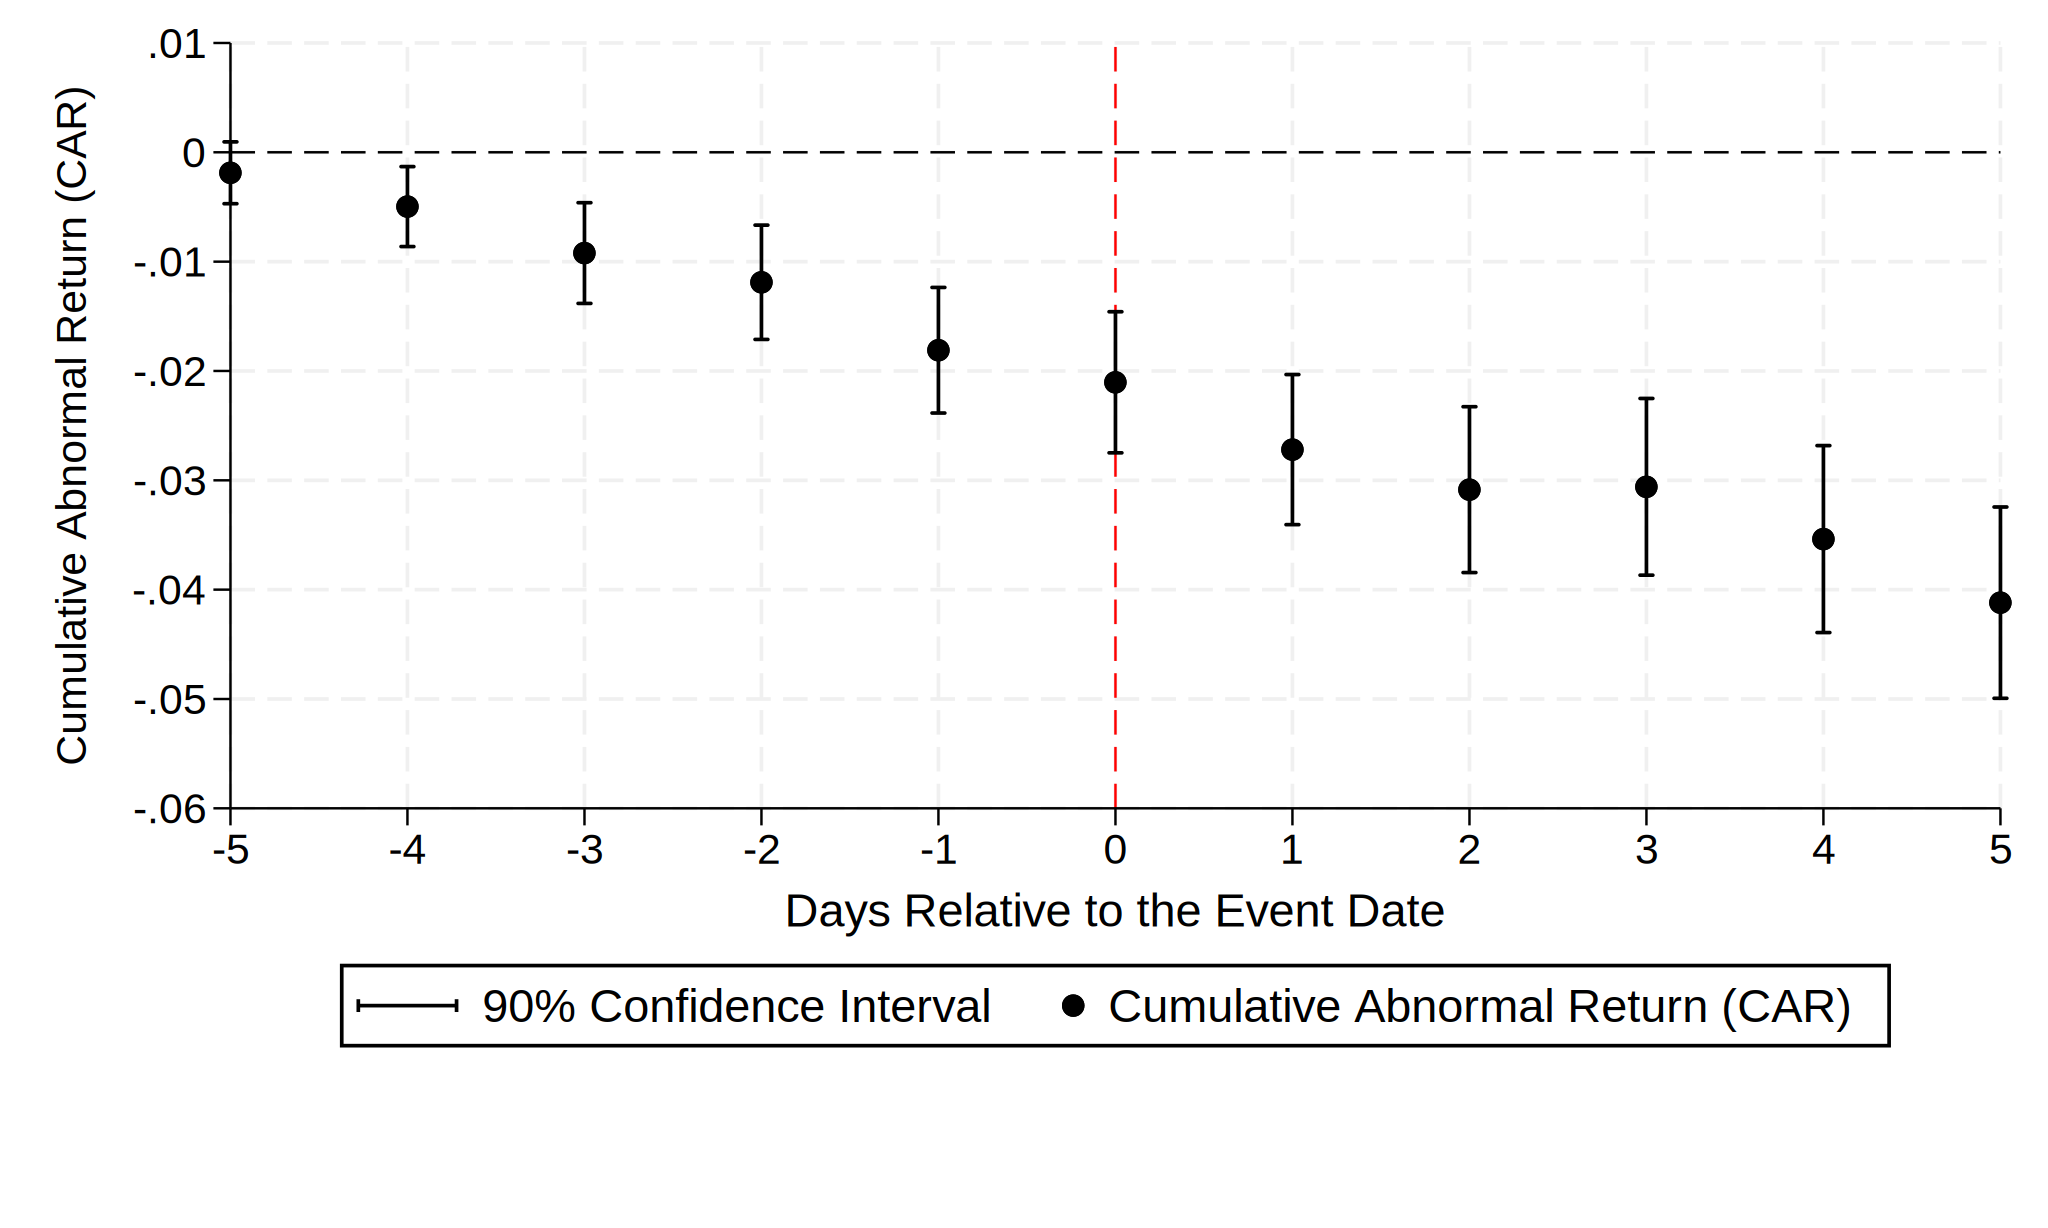

In [2]:
%%stata

****************************
* Dynamic Event Study Plot with 95% CI
****************************

clear all
set more off

global PROCESSED_DATA "processed_data"
global FIGURES "figures"

* iterate over the two event types: proposal created and proposal end
foreach stage in created end {
    import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", varnames(1) clear
    keep index car
    destring index car, replace force
    collapse (mean) mean_car=car (sd) sd_car=car (count) N_car=car, by(index)
    gen se_car = sd_car / sqrt(N_car)
    gen tcrit  = invttail(N_car-1, 0.05)
    gen lo_car = mean_car - tcrit*se_car
    gen hi_car = mean_car + tcrit*se_car

    * ----- Plot with shaded 90% CI bands -----
    twoway ///
        (rcap lo_car hi_car index, lcolor(black) lwidth(large)) ///
        (scatter mean_car index, lwidth(medthick) lpattern(solid)  ///
                lcolor(black) msymbol(circle)  mcolor(black)  msize(medium)) ///
        , ///
        xline(0, lpattern(dash) lwidth(thin) lcolor(red)) ///
        yline(0, lpattern(dash) lwidth(thin) lcolor(black)) ///
        legend(order(1 "90% Confidence Interval" 2 "Cumulative Abnormal Return (CAR)") position(6) ring(1) cols(2) ///
        region(lstyle(solid) lcolor(black) fcolor(white) margin(small)) ///
        size(medium)) ///
        xtitle("Days Relative to the Event Date", size(medium)) ///
        ytitle("Cumulative Abnormal Return (CAR)") ///
        graphregion(color(white) margin(zero+10)) ///
        plotregion(margin(zero)) ///
        xscale(range(-5 5)) ///
        xlabel(-5(1)5) ///
        yscale(range(-0.06 0.01)) ///
        ylabel(-0.06(0.01)0.01)
        
    graph export "$FIGURES/car_dynamic_`stage'.pdf", replace
}



. ****************************
. * Dynamic Event Study Plot with 90% CI — Markers + Linestyle + Bands
. ****************************
. 
. clear all

. set more off

. 
. global PROCESSED_DATA "processed_data"

. global FIGURES "figures"

. 
. foreach stage in created end {
  2. 
.     * ---------- ALL sample ----------
.     import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", v
> arnames(1) clear
  3.     keep index car
  4.     destring index car, replace force
  5.     collapse (mean) mean_car_all=car (sd) sd_car_all=car (count) N_all=car
> , by(index)
  6.     gen se_car_all = sd_car_all / sqrt(N_all)
  7.     gen tcrit_all  = invttail(N_all-1, 0.05)
  8.     gen lo_car_all = mean_car_all - tcrit_all*se_car_all
  9.     gen hi_car_all = mean_car_all + tcrit_all*se_car_all
 10.     tempfile all
 11.     save `all'
 12. 
.     * ---------- Subsample: non_whale_victory_vn == 1 ----------
.     import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", 

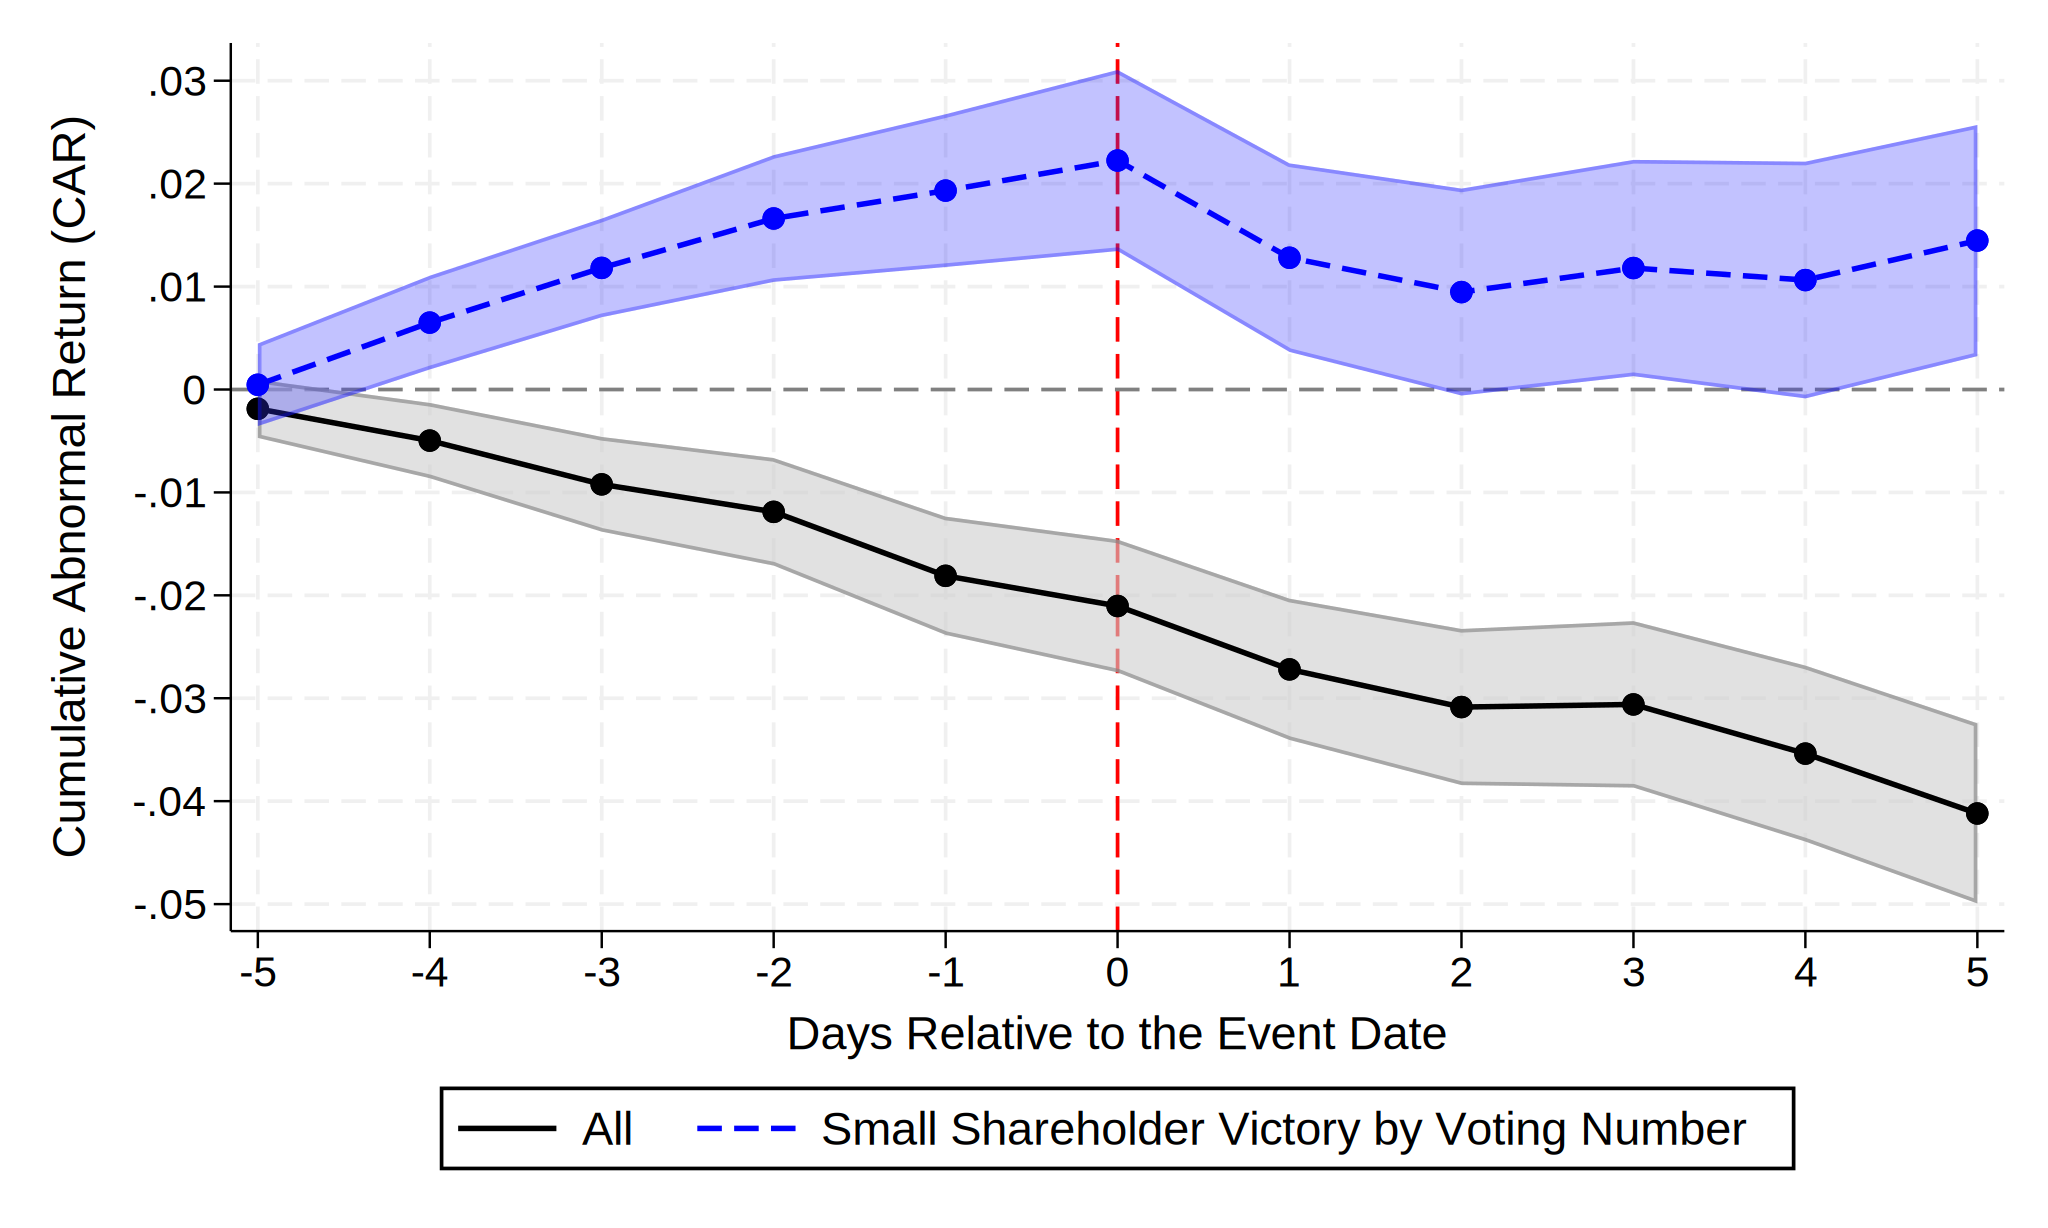

In [3]:
%%stata
****************************
* Dynamic Event Study Plot with 90% CI — Markers + Linestyle + Bands
****************************

clear all
set more off

global PROCESSED_DATA "processed_data"
global FIGURES "figures"

foreach stage in created end {

    * ---------- ALL sample ----------
    import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", varnames(1) clear
    keep index car
    destring index car, replace force
    collapse (mean) mean_car_all=car (sd) sd_car_all=car (count) N_all=car, by(index)
    gen se_car_all = sd_car_all / sqrt(N_all)
    gen tcrit_all  = invttail(N_all-1, 0.05)
    gen lo_car_all = mean_car_all - tcrit_all*se_car_all
    gen hi_car_all = mean_car_all + tcrit_all*se_car_all
    tempfile all
    save `all'

    * ---------- Subsample: non_whale_victory_vn == 1 ----------
    import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", varnames(1) clear
    keep if non_whale_victory_vn == 1
    keep index car
    destring index car, replace force
    collapse (mean) mean_car_nw=car (sd) sd_car_nw=car (count) N_nw=car, by(index)
    gen se_car_nw = sd_car_nw / sqrt(N_nw)
    gen tcrit_nw  = invttail(N_nw-1, 0.05)
    gen lo_car_nw = mean_car_nw - tcrit_nw*se_car_nw
    gen hi_car_nw = mean_car_nw + tcrit_nw*se_car_nw

    * Merge with ALL-sample summary
    merge 1:1 index using `all', nogen

    * ---------- Plot: band + line + marker for each group ----------
    twoway ///
        /* ALL: band + line + marker */ ///
        (rarea  lo_car_all hi_car_all index, color(gs12%60) lcolor(gs8)) ///
        (line    mean_car_all index, lcolor(black) lwidth(medthick)) ///
        (scatter mean_car_all index, mcolor(black)  msymbol(circle) msize(medium)) ///
        /* Small-holder victory: band + dashed line + marker */ ///
        (rarea  lo_car_nw hi_car_nw index, color(blue%30) lcolor(blue)) ///
        (line    mean_car_nw index, lcolor(blue)  lwidth(medthick) lpattern(dash)) ///
        (scatter mean_car_nw index, mcolor(blue)  msymbol(circle) msize(medium)) ///
        , ///
        xline(0, lpattern(dash) lcolor(red)) ///
        yline(0, lpattern(dash) lcolor(gs8)) ///
        legend(order(2 "All"  5 "Small Shareholder Victory by Voting Number") ///
               position(6) ring(1) cols(2) ///
               region(lstyle(solid) lcolor(black) fcolor(white) margin(small)) ///
               size(medium)) ///
        xtitle("Days Relative to the Event Date", size(medium)) ///
        ytitle("Cumulative Abnormal Return (CAR)", size(medium)) ///
        graphregion(color(white)) ///
        xscale(range(-5 5)) xlabel(-5(1)5) ///
        yscale(range(-0.05 0.03)) ylabel(-0.05(0.01)0.03)

    graph export "$FIGURES/car_dynamic_`stage'_non_whale_victory_vn.pdf", replace
}



. ****************************
. * Dynamic Event Study Plot with 90% CI — Markers + Linestyle + Bands
. ****************************
. 
. clear all

. set more off

. 
. global PROCESSED_DATA "processed_data"

. global FIGURES "figures"

. 
. foreach stage in created end {
  2. 
.     * ---------- ALL sample ----------
.     import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", v
> arnames(1) clear
  3.     keep index car
  4.     destring index car, replace force
  5.     collapse (mean) mean_car_all=car (sd) sd_car_all=car (count) N_all=car
> , by(index)
  6.     gen se_car_all = sd_car_all / sqrt(N_all)
  7.     gen tcrit_all  = invttail(N_all-1, 0.05)
  8.     gen lo_car_all = mean_car_all - tcrit_all*se_car_all
  9.     gen hi_car_all = mean_car_all + tcrit_all*se_car_all
 10.     tempfile all
 11.     save `all'
 12. 
.     * ---------- Subsample: non_whale_victory_vn == 1 ----------
.     import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", 

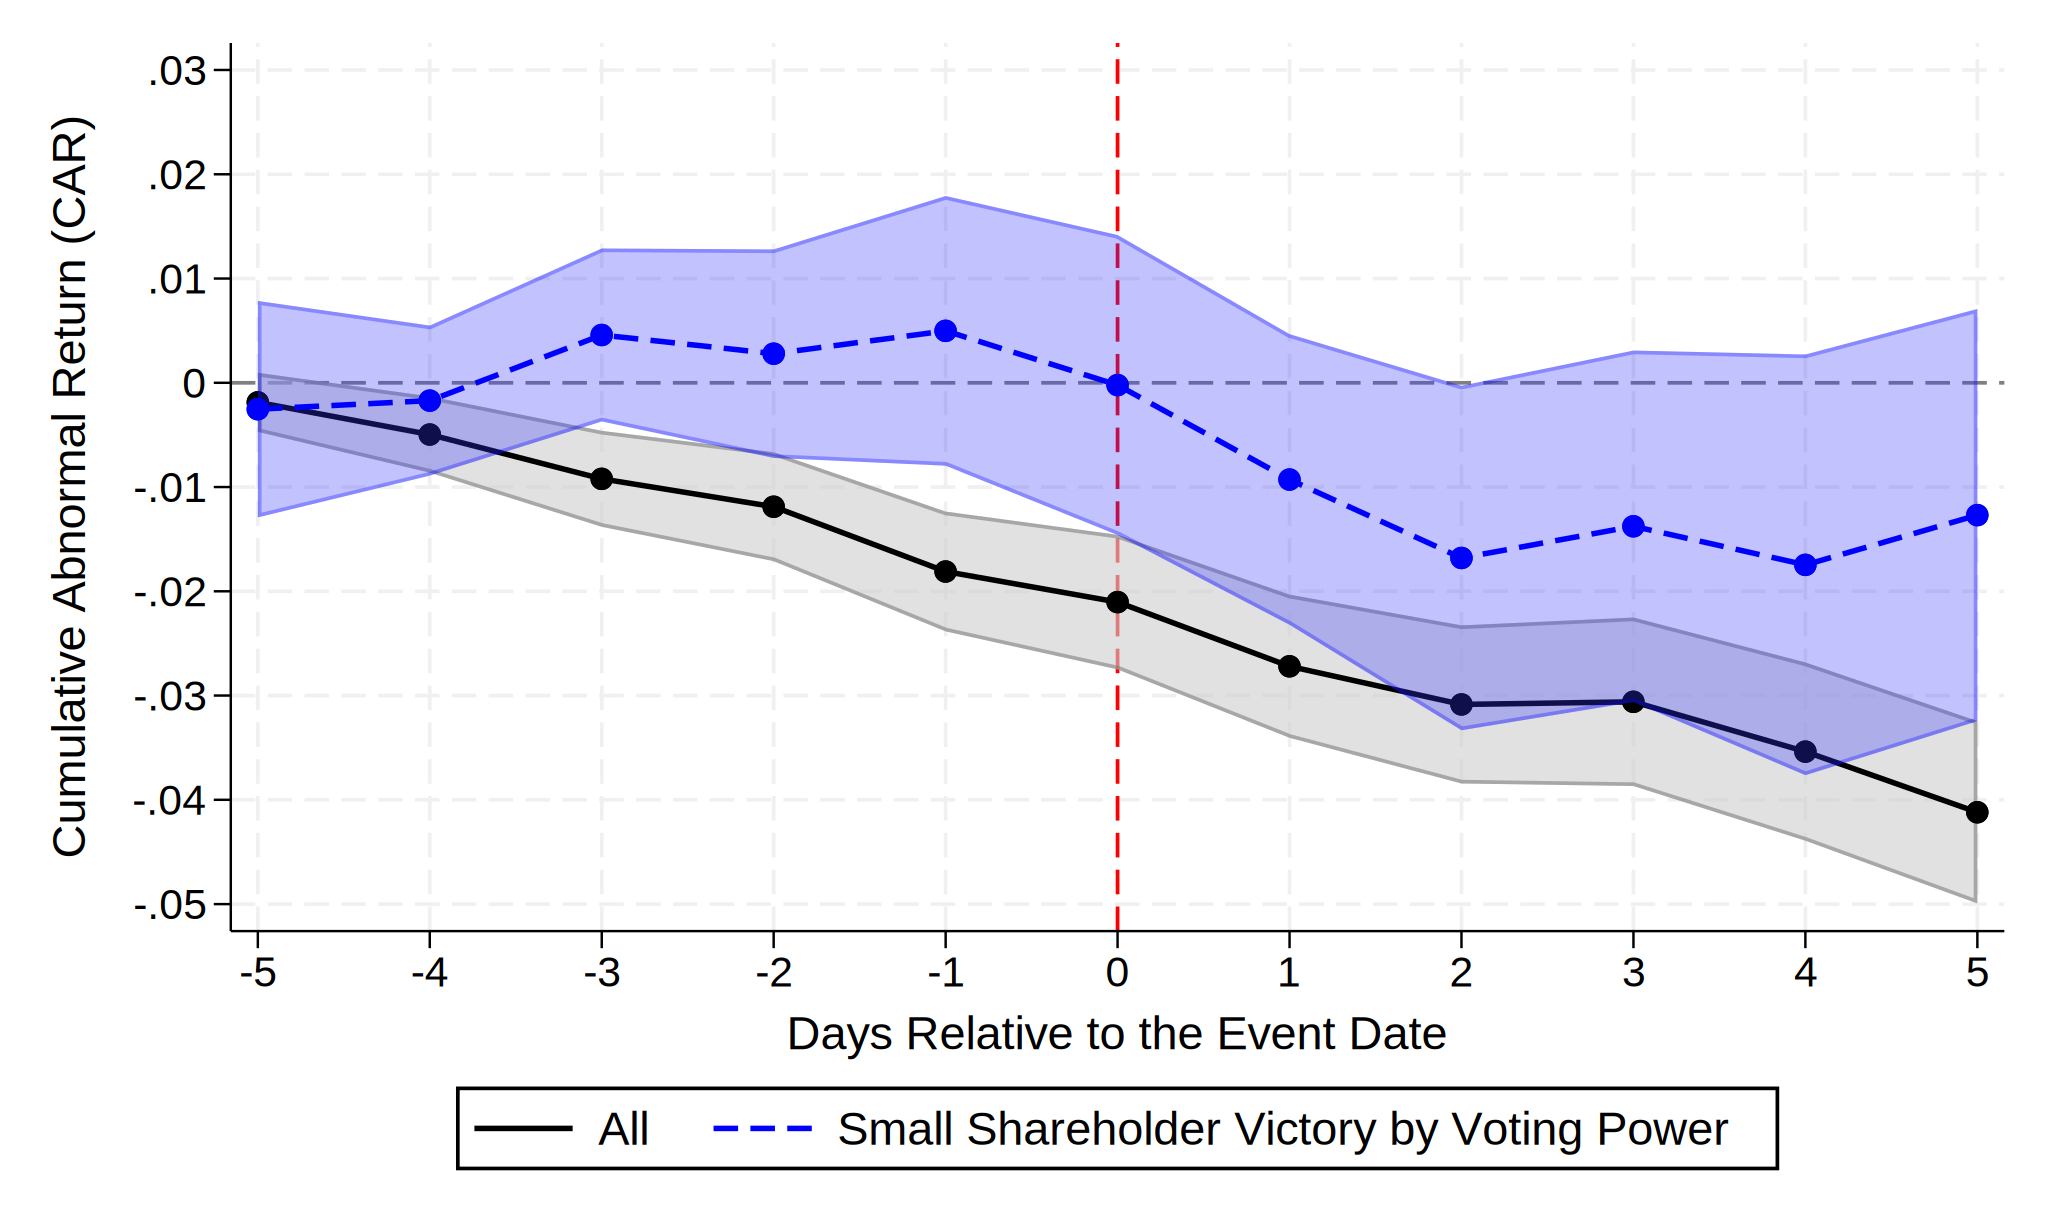

In [4]:
%%stata
****************************
* Dynamic Event Study Plot with 90% CI — Markers + Linestyle + Bands
****************************

clear all
set more off

global PROCESSED_DATA "processed_data"
global FIGURES "figures"

foreach stage in created end {

    * ---------- ALL sample ----------
    import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", varnames(1) clear
    keep index car
    destring index car, replace force
    collapse (mean) mean_car_all=car (sd) sd_car_all=car (count) N_all=car, by(index)
    gen se_car_all = sd_car_all / sqrt(N_all)
    gen tcrit_all  = invttail(N_all-1, 0.05)
    gen lo_car_all = mean_car_all - tcrit_all*se_car_all
    gen hi_car_all = mean_car_all + tcrit_all*se_car_all
    tempfile all
    save `all'

    * ---------- Subsample: non_whale_victory_vn == 1 ----------
    import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", varnames(1) clear
    keep if non_whale_victory_vp == 1
    keep index car
    destring index car, replace force
    collapse (mean) mean_car_nw=car (sd) sd_car_nw=car (count) N_nw=car, by(index)
    gen se_car_nw = sd_car_nw / sqrt(N_nw)
    gen tcrit_nw  = invttail(N_nw-1, 0.05)
    gen lo_car_nw = mean_car_nw - tcrit_nw*se_car_nw
    gen hi_car_nw = mean_car_nw + tcrit_nw*se_car_nw

    * Merge with ALL-sample summary
    merge 1:1 index using `all', nogen

    * ---------- Plot: band + line + marker for each group ----------
    twoway ///
        /* ALL: band + line + marker */ ///
        (rarea  lo_car_all hi_car_all index, color(gs12%60) lcolor(gs8)) ///
        (line    mean_car_all index, lcolor(black) lwidth(medthick)) ///
        (scatter mean_car_all index, mcolor(black)  msymbol(circle) msize(medium)) ///
        /* Small-holder victory: band + dashed line + marker */ ///
        (rarea  lo_car_nw hi_car_nw index, color(blue%30) lcolor(blue)) ///
        (line    mean_car_nw index, lcolor(blue)  lwidth(medthick) lpattern(dash)) ///
        (scatter mean_car_nw index, mcolor(blue)  msymbol(circle) msize(medium)) ///
        , ///
        xline(0, lpattern(dash) lcolor(red)) ///
        yline(0, lpattern(dash) lcolor(gs8)) ///
        legend(order(2 "All"  5 "Small Shareholder Victory by Voting Power") ///
               position(6) ring(1) cols(2) ///
               region(lstyle(solid) lcolor(black) fcolor(white) margin(small)) ///
               size(medium)) ///
        xtitle("Days Relative to the Event Date", size(medium)) ///
        ytitle("Cumulative Abnormal Return (CAR)", size(medium)) ///
        graphregion(color(white)) ///
        xscale(range(-5 5)) xlabel(-5(1)5) ///
        yscale(range(-0.05 0.03)) ylabel(-0.05(0.01)0.03)

    graph export "$FIGURES/car_dynamic_`stage'_non_whale_victory_vp.pdf", replace
}



. ****************************
. * Dynamic Event Study Plot with 90% CI — Markers + Linestyle + Bands
. ****************************
. 
. clear all

. set more off

. 
. global PROCESSED_DATA "processed_data"

. global FIGURES "figures"

. 
. foreach stage in created end {
  2. 
.     * ---------- ALL sample ----------
.     import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", v
> arnames(1) clear
  3.     keep index car
  4.     destring index car, replace force
  5.     collapse (mean) mean_car_all=car (sd) sd_car_all=car (count) N_all=car
> , by(index)
  6.     gen se_car_all = sd_car_all / sqrt(N_all)
  7.     gen tcrit_all  = invttail(N_all-1, 0.05)
  8.     gen lo_car_all = mean_car_all - tcrit_all*se_car_all
  9.     gen hi_car_all = mean_car_all + tcrit_all*se_car_all
 10.     tempfile all
 11.     save `all'
 12. 
.     * ---------- Subsample: non_whale_victory_vn == 1 ----------
.     import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", 

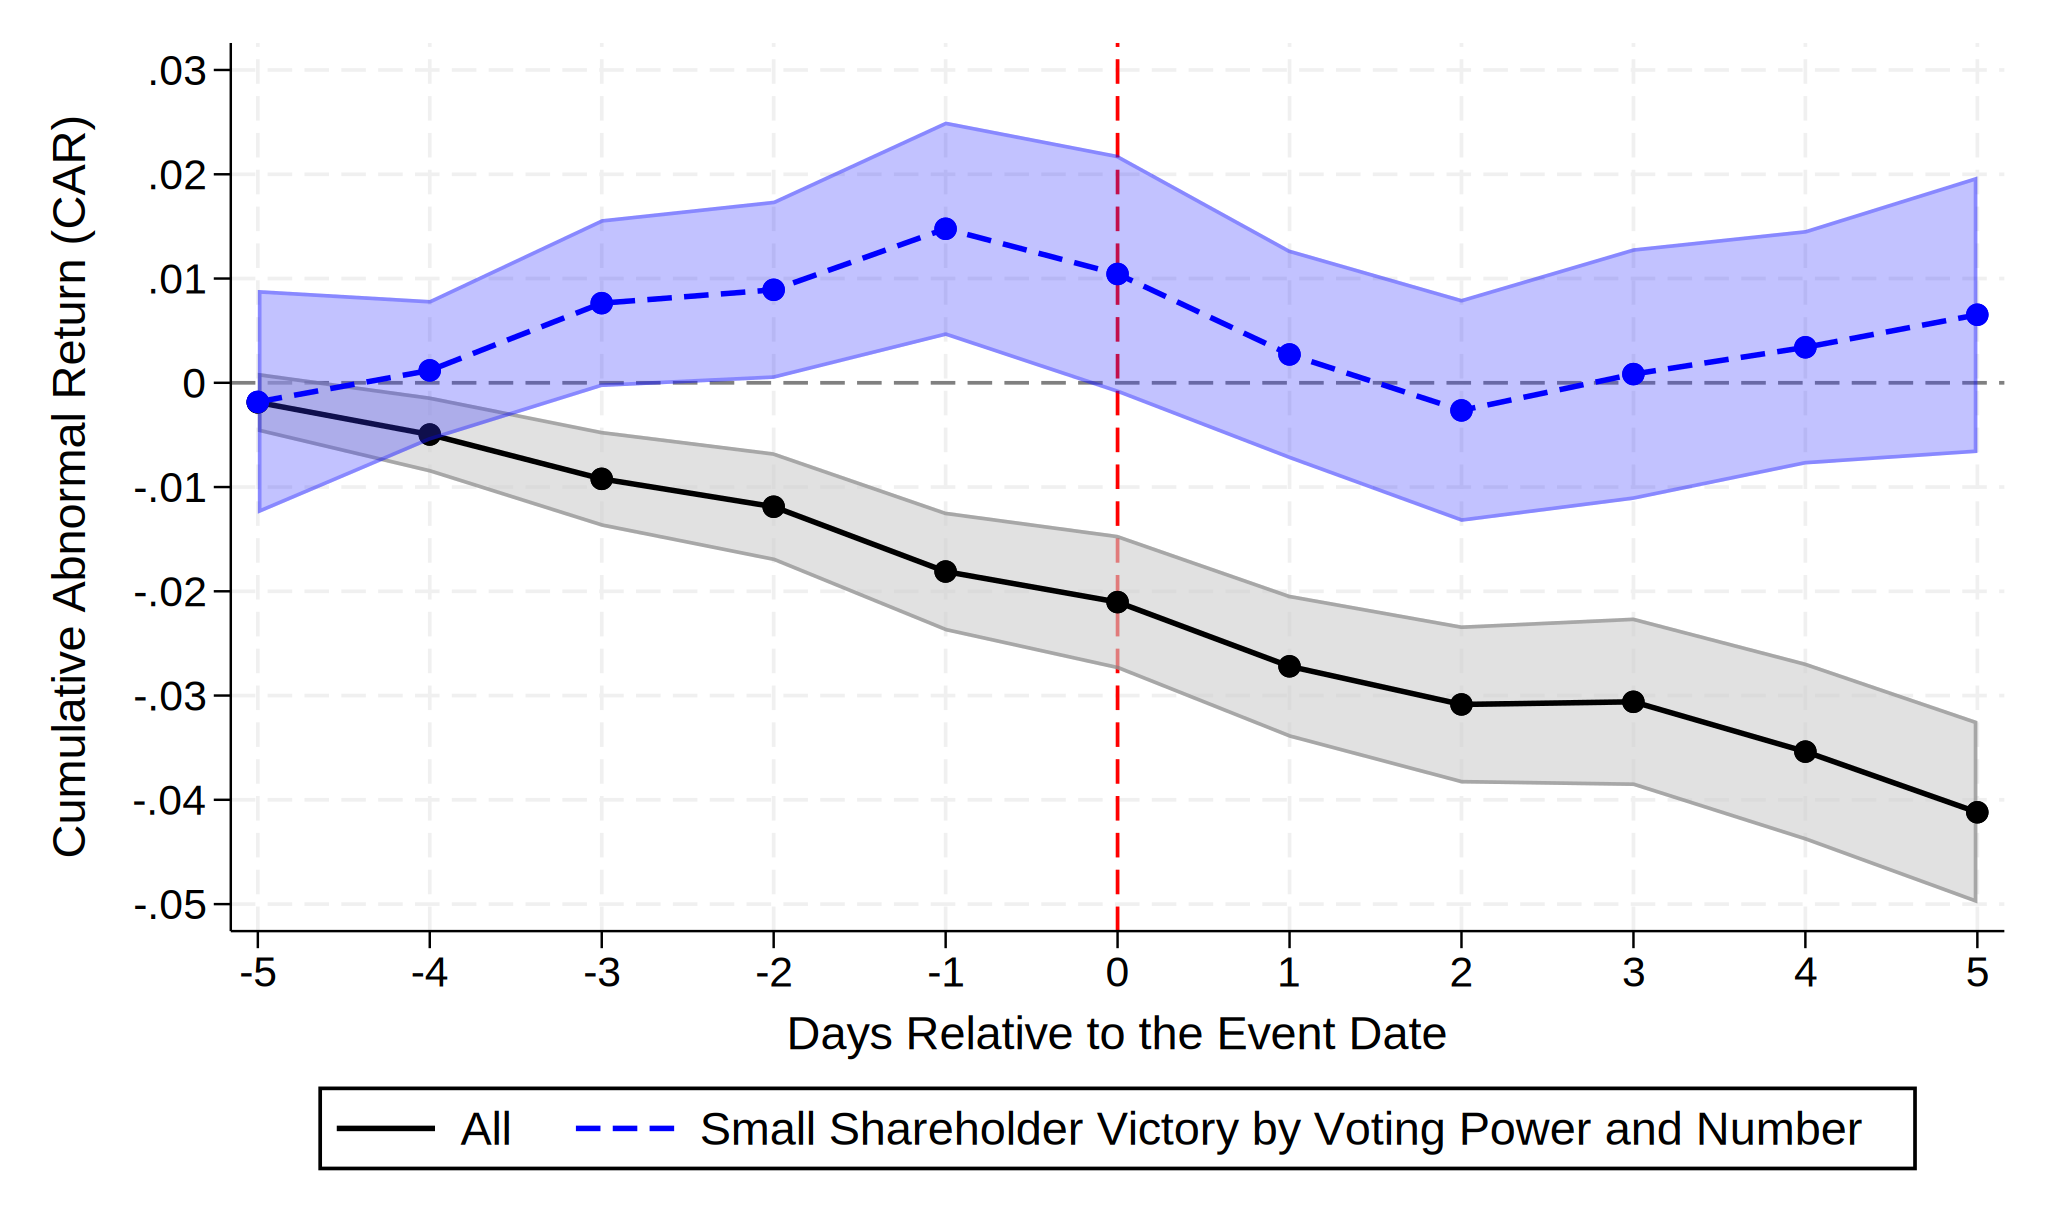

In [5]:
%%stata
****************************
* Dynamic Event Study Plot with 90% CI — Markers + Linestyle + Bands
****************************

clear all
set more off

global PROCESSED_DATA "processed_data"
global FIGURES "figures"

foreach stage in created end {

    * ---------- ALL sample ----------
    import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", varnames(1) clear
    keep index car
    destring index car, replace force
    collapse (mean) mean_car_all=car (sd) sd_car_all=car (count) N_all=car, by(index)
    gen se_car_all = sd_car_all / sqrt(N_all)
    gen tcrit_all  = invttail(N_all-1, 0.05)
    gen lo_car_all = mean_car_all - tcrit_all*se_car_all
    gen hi_car_all = mean_car_all + tcrit_all*se_car_all
    tempfile all
    save `all'

    * ---------- Subsample: non_whale_victory_vn == 1 ----------
    import delimited using "$PROCESSED_DATA/event_study_panel_`stage'.csv", varnames(1) clear
    keep if non_whale_victory_vp_vn == 1
    keep index car
    destring index car, replace force
    collapse (mean) mean_car_nw=car (sd) sd_car_nw=car (count) N_nw=car, by(index)
    gen se_car_nw = sd_car_nw / sqrt(N_nw)
    gen tcrit_nw  = invttail(N_nw-1, 0.05)
    gen lo_car_nw = mean_car_nw - tcrit_nw*se_car_nw
    gen hi_car_nw = mean_car_nw + tcrit_nw*se_car_nw

    * Merge with ALL-sample summary
    merge 1:1 index using `all', nogen

    * ---------- Plot: band + line + marker for each group ----------
    twoway ///
        /* ALL: band + line + marker */ ///
        (rarea  lo_car_all hi_car_all index, color(gs12%60) lcolor(gs8)) ///
        (line    mean_car_all index, lcolor(black) lwidth(medthick)) ///
        (scatter mean_car_all index, mcolor(black)  msymbol(circle) msize(medium)) ///
        /* Small-holder victory: band + dashed line + marker */ ///
        (rarea  lo_car_nw hi_car_nw index, color(blue%30) lcolor(blue)) ///
        (line    mean_car_nw index, lcolor(blue)  lwidth(medthick) lpattern(dash)) ///
        (scatter mean_car_nw index, mcolor(blue)  msymbol(circle) msize(medium)) ///
        , ///
        xline(0, lpattern(dash) lcolor(red)) ///
        yline(0, lpattern(dash) lcolor(gs8)) ///
        legend(order(2 "All"  5 "Small Shareholder Victory by Voting Power and Number") ///
               position(6) ring(1) cols(2) ///
               region(lstyle(solid) lcolor(black) fcolor(white) margin(small)) ///
               size(medium)) ///
        xtitle("Days Relative to the Event Date", size(medium)) ///
        ytitle("Cumulative Abnormal Return (CAR)", size(medium)) ///
        graphregion(color(white)) ///
        xscale(range(-5 5)) xlabel(-5(1)5) ///
        yscale(range(-0.05 0.03)) ylabel(-0.05(0.01)0.03)

    graph export "$FIGURES/car_dynamic_`stage'_non_whale_victory_vp_vn.pdf", replace
}